# Kullanılan Kaynaklar

1. https://dsp.stackexchange.com/questions/53125/write-a-440-hz-sine-wave-to-wav-file-using-python-and-scipy
2. https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.write.html#scipy.io.wavfile.write
3. https://makersportal.com/blog/2018/9/13/audio-processing-in-python-part-i-sampling-and-the-fast-fourier-transform

In [87]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wavfile
from scipy.fftpack import fft
import IPython

In [88]:
def sine(Time,Frequency,Sample):
    t = np.linspace(0, Time, Sample*Time)
    amplitude = np.iinfo(np.int16).max
    return amplitude*np.sin(2*np.pi*Frequency*t)

In [89]:
def sine_combine(Time, Sample):
    sine_comb = 0
    n = input("Give me the amount of sine waves you want to combine")
    Frequencies = np.zeros(int(n))
    for i in range(len(Frequencies)):
        Frequencies[i] = input("give frequency")
    t = np.linspace(0, Time, Sample*Time)
    for i in range(len(Frequencies)):
        sine_comb += np.sin(2*np.pi*Frequencies[i]*t)   
    amplitude = np.iinfo(np.int16).max
    return amplitude*sine_comb
    

In [90]:
def fourier_plot(wav_data, title, Sample):
    ft = np.fft.fft(wav_data)
    ft_abs = np.abs(ft)
    inverse_ft = np.fft.ifft(ft)
    
    #plot magnitude specturum
    
    plt.figure(figsize = (12,3),label = "fft")
    
    frequency = np.linspace(0, Sample, len(ft_abs))
    #plt.xlim(400,500)
    plt.plot(frequency, ft_abs)
    plt.title("fft of " + title)
    
    plt.figure(figsize = (12,3),label = "ifft")
    plt.plot(frequency, inverse_ft)
    plt.xlim(1000,1250)
    plt.title("ifft of " + title)
    plt.show()

In [91]:
wavfile.write('sine_comb.wav', 44100, sine_combine(1,44100).astype(np.int16))

Give me the amount of sine waves you want to combine 4
give frequency 749
give frequency 5550
give frequency 14
give frequency 3169


In [92]:
Time=1
Freq= 720
Sample= 44100
a = sine(Time,Freq,Sample)

In [93]:
wavfile.write('sa.wav', 44100, a.astype(np.int16))

In [94]:
fs_rate_sine_comb, data_sine_comb = wavfile.read("sine_comb.wav")

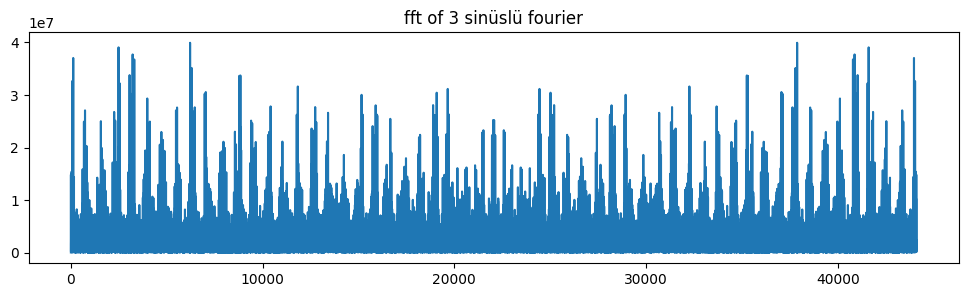

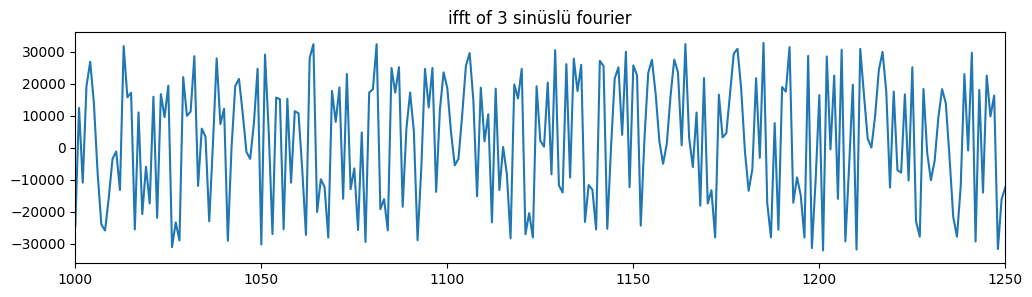

In [95]:
fourier_plot(data_sine_comb, "3 sinüslü fourier", 44100)

In [96]:
IPython.display.Audio("sine_comb.wav")

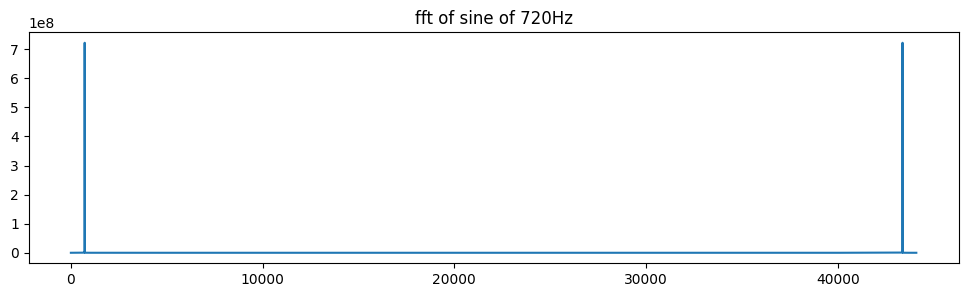

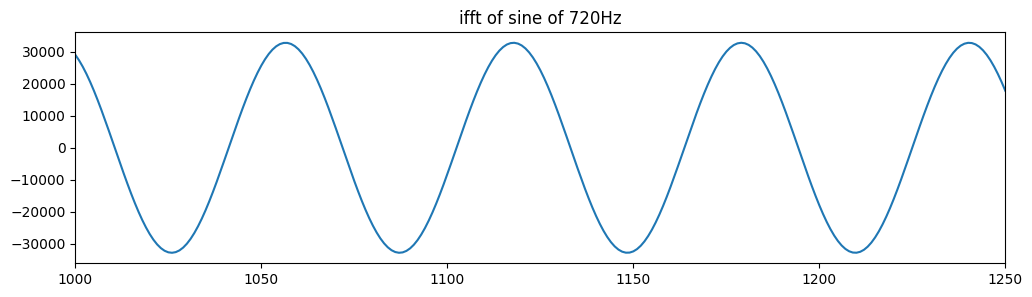

In [97]:
fourier_plot(data, "sine of 720Hz", 44100)

In [98]:
IPython.display.Audio("sa.wav")